In [0]:
from scipy.interpolate import griddata
import numpy as np
import operator
from google.colab import files
import pandas as pd

In [3]:
uploaded = files.upload()

Saving MainDataset2.csv to MainDataset2 (4).csv


In [0]:
data = pd.read_csv('MainDataset2.csv')

In [9]:
print(0.8 * len(data))
print(0.2 * len(data))

152.8
38.2


In [0]:
dataTrain = data[50:]
dataValidation = data[0:49]

In [0]:

def distance(lat1,long1,lat2,long2):
  return ((lat1-lat2)**2 + (long1-long2)**2)**-2

def distance2(lat1,long1,lat2,long2):
  return abs(lat1-lat2) + abs(long1-long2)


def itsOkaytoAddZero(lat,long,location):
  for [lat2,long2] in location:
    if distance(lat,long,lat2,long2) < 0.001:
      print('Not included')
      print(distance(lat,long,lat2,long2))
      return False
  return True


def itsOkaytoAddZero2(lat,long,location):
  for [lat2,long2] in location:
    if distance2(lat,long,lat2,long2) < 0.035:
      print('Not included')
      print(distance(lat,long,lat2,long2))
      return False
  return True

In [85]:
locationM = []
locationR = []
locationDV = []
locationT = []
locationF = []
locationD = []

lat = []
long = []
latM = []
longM = []
latR = []
longR = []
latDV = []
longDV = []
latT = []
longT = []
latF = []
longF = []
latD = []
longD = []


zM = []
zR = []
zDV = []
zT = []
zF = []
zD = []


for i,row in dataTrain.iterrows():
  roundedLat = row[4]
  roundedLong = row[5]
  lat += [roundedLat]
  long += [roundedLong]
  if row[6] == 'Murder':
    latM += [roundedLat]
    longM += [roundedLong]
    locationM += [[roundedLat,roundedLong]]
    zM += [100]
  elif row[6] == 'Rape':
    latR += [roundedLat]
    longR += [roundedLong]
    locationR += [[roundedLat,roundedLong]]
    zR += [100]
  elif row[6] == 'Domestic Violence':
    latDV += [roundedLat]
    longDV += [roundedLong]
    locationDV += [[roundedLat,roundedLong]]
    zDV += [100]
  elif row[6] == 'Theft':
    latT += [roundedLat]
    longT += [roundedLong]
    locationT += [[roundedLat,roundedLong]]
    zT += [100]
  elif row[6] == 'Fraud':
    latF += [roundedLat]
    longF += [roundedLong]
    locationF += [[roundedLat,roundedLong]]
    zF += [100]
  elif row[6] == 'Drugs':
    latD += [roundedLat]
    longD += [roundedLong]
    locationD += [[roundedLat,roundedLong]]
    zD += [100]
    
    
minLat = sorted(lat)[2]
maxLat = sorted(lat)[-3]
minLong = sorted(long)[3]
maxLong = sorted(long)[-3]


zeroLat = np.arange(minLat,maxLat,0.05)
zeroLong = np.arange(minLong,maxLong,0.05)
for lt in zeroLat:
  for lng in zeroLong:
    if itsOkaytoAddZero2(lt,lng,locationM):
      locationM += [[lt,lng]]
      zM += [0]
    if itsOkaytoAddZero(lt,lng,locationR):
      locationR += [[lt,lng]]
      zR += [0]
    if itsOkaytoAddZero(lt,lng,locationDV):
      locationDV += [[lt,lng]]
      zDV += [0]
    if itsOkaytoAddZero(lt,lng,locationT):
      locationT += [[lt,lng]]
      zT += [0]
    if itsOkaytoAddZero(lt,lng,locationF):
      locationF += [[lt,lng]]
      zF += [0]
    if itsOkaytoAddZero(lt,lng,locationD):
      locationD += [[lt,lng]]
      zD += [0]
    


Not included
24491728.6176521
Not included
10388215.315248907
Not included
9549205340.65228
Not included
11985384.234091835
Not included
840059.0608059592
Not included
4387259.479645803
Not included
62012448.45491171
Not included
149468184.35062817
Not included
4497697.033765277
Not included
405040438.8017854
Not included
10280739.764501497
Not included
2549364.8136895127
Not included
1146816405.099354
Not included
2213512.5478668553
Not included
226896592.8498553
Not included
4435059.578335422
Not included
2169245.373147598
Not included
5153104.218213089
Not included
2554611.131045526
Not included
51711982.887458555
Not included
3767971.491755427
Not included
8236970.692274579
Not included
1647252.868741469
Not included
3122064.0802092776


In [0]:
# newLat = np.arange(minLat,maxLat,0.05)
# newLong = np.arange(minLong,maxLong,0.05)
# for lt in newLat:
#   for lng in newLong:
#     location += [[lt,lng]]
#     z += [0] 

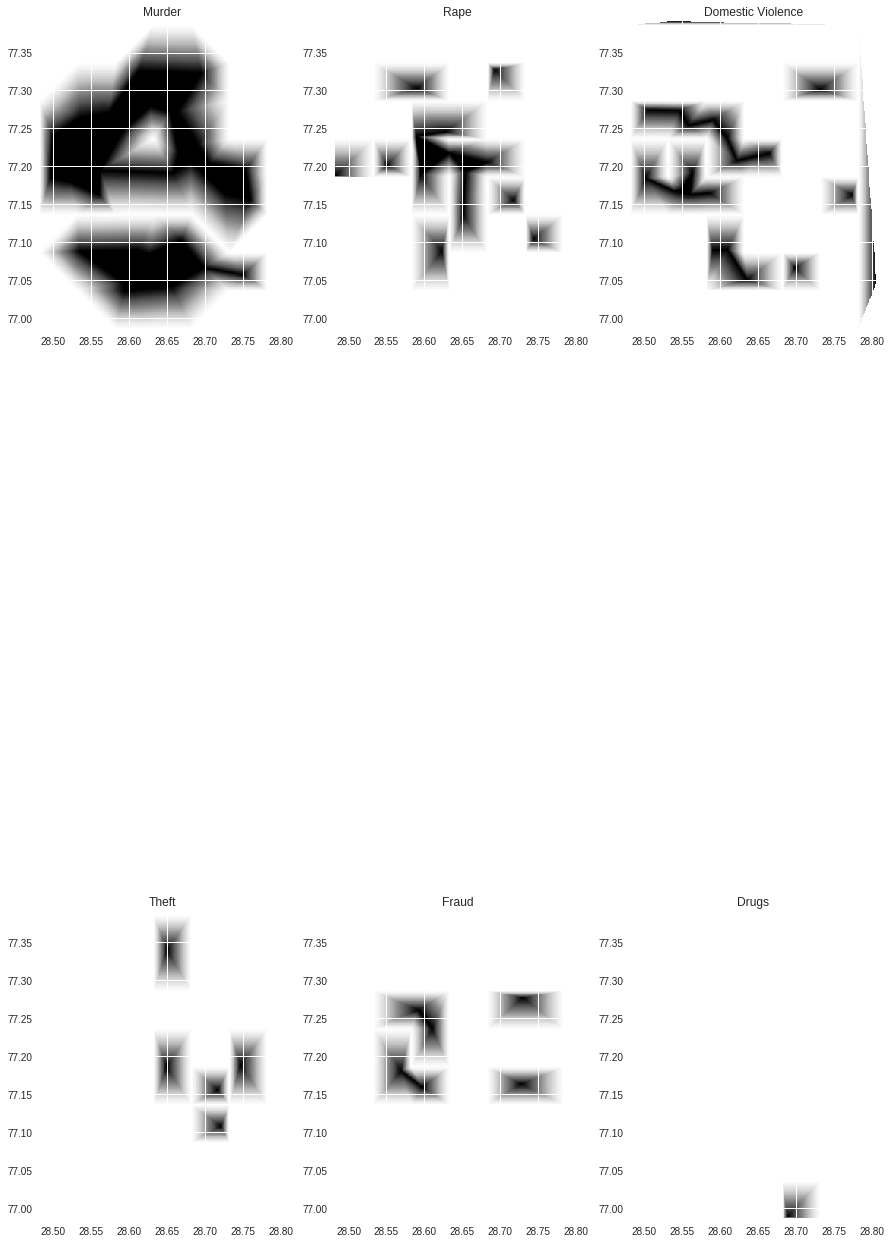

In [88]:
LocationM = np.asarray(locationM,dtype = float)
LocationR = np.asarray(locationR,dtype = float)
LocationDV = np.asarray(locationDV,dtype = float)
LocationT = np.asarray(locationT,dtype = float)
LocationF = np.asarray(locationF,dtype = float)
LocationD = np.asarray(locationD,dtype = float)


ZM = np.asarray(zM,dtype = int)
ZR = np.asarray(zR,dtype = int)
ZDV = np.asarray(zDV,dtype = int)
ZT = np.asarray(zT,dtype = int)
ZF = np.asarray(zF,dtype = int)
ZD = np.asarray(zD,dtype = int)

grid_x, grid_y = np.mgrid[minLat:maxLat:0.001,minLong:maxLong:0.001]

Method = 'linear'

gridM = griddata(LocationM, ZM, (grid_x, grid_y), method=Method,fill_value=0.1)
gridR = griddata(LocationR, ZR, (grid_x, grid_y), method=Method,fill_value=0.1)
gridDV = griddata(LocationDV, ZDV, (grid_x, grid_y), method=Method,fill_value=0.1)
gridT = griddata(LocationT, ZT, (grid_x, grid_y), method=Method,fill_value=0.1)
gridF = griddata(LocationF, ZF, (grid_x, grid_y), method=Method,fill_value=0.1)
gridD = griddata(LocationD, ZD, (grid_x, grid_y), method=Method,fill_value=0.1)

import matplotlib.pyplot as plt

plt.subplot(231)
plt.imshow(gridM.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Murder')


plt.subplot(232)
plt.imshow(gridR.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Rape')


plt.subplot(233)
plt.imshow(gridDV.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Domestic Violence')


plt.subplot(234)
plt.imshow(gridT.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Theft')


plt.subplot(235)
plt.imshow(gridF.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Fraud')


plt.subplot(236)
plt.imshow(gridD.T, extent=(minLat,maxLat,minLong,maxLong), origin='lower')
plt.title('Drugs')


plt.gcf().set_size_inches(15,30)
plt.show()


In [0]:
def getIntensity(lat,long):
  x = (lat - minLat)/(maxLat - minLat) * len(gridM)
  y = (long - minLong)/(maxLong - minLong) * len(gridM)
  intensity = dict()
  if lat > maxLat or lat < minLat or long > maxLong or long < minLong:
    return 'NULL'
  intensity['Murder'] = gridM[round(x)][round(y)] 
  intensity['Rape'] = gridR[round(x)][round(y)] 
  intensity['Domestic Violence'] = gridDV[round(x)][round(y)]
  intensity['Theft'] = gridT[round(x)][round(y)]
  intensity['Fraud'] = gridF[round(x)][round(y)]
  intensity['Drugs'] = gridD[round(x)][round(y)]
  print(intensity)
  print(max(intensity.items(), key=operator.itemgetter(1))[0])
  return (max(intensity.items(), key=operator.itemgetter(1))[0])

  
  

In [89]:
total = len(dataValidation)
count = 0
for i,row in dataValidation.iterrows():
  if row[6] == getIntensity(row[4],row[5]):
    count += 1
    
print('Accuracy :',count/total)

{'Murder': 83.65828963828082, 'Rape': 68.47204628706088, 'Domestic Violence': 67.00920286816599, 'Theft': 0.0, 'Fraud': 67.00920286816599, 'Drugs': 0.0}
Murder
{'Murder': 58.44431095236247, 'Rape': 1.1184611903298433e-11, 'Domestic Violence': 0.0, 'Theft': 1.0816703086950204e-11, 'Fraud': 0.0, 'Drugs': 0.0}
Murder
{'Murder': 77.56297143743238, 'Rape': 12.959285165808165, 'Domestic Violence': 0.0, 'Theft': 0.0, 'Fraud': 0.0, 'Drugs': 0.0}
Murder
{'Murder': 100.0, 'Rape': 27.240162896198285, 'Domestic Violence': 34.7764506522183, 'Theft': 0.0, 'Fraud': 30.347841440806377, 'Drugs': 0.0}
Murder
{'Murder': 83.35050269982224, 'Rape': 51.17628800319814, 'Domestic Violence': 0.0, 'Theft': 45.66946874229339, 'Fraud': 0.0, 'Drugs': 0.0}
Murder
{'Murder': 37.98880211904326, 'Rape': 1.1184611903298433e-11, 'Domestic Violence': 0.0, 'Theft': 1.0816703086950204e-11, 'Fraud': 0.0, 'Drugs': 0.0}
Murder
{'Murder': 65.89286659738627, 'Rape': 0.0, 'Domestic Violence': 74.28169056398565, 'Theft': 0.0, 'Fr